### Importing required libraries

In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


### Read relevant CSV file into Pandas Dataframe

In [2]:
df = pd.read_csv("loan.csv")

C:\Users\SreekumarRadhakrishn\AppData\Local\Temp\ipykernel_24052\2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


### Checking the dataframe

In [3]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

### Dropping all columns with NaN, NA or Null values (cleaning)

In [4]:
df1 = df.dropna(how='all', axis=1)

### Checking info on the cleaned dataframe 'df1'

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Making a new dataframe 'df_useful' by subsetting the columns seemingly useful for analysis

In [6]:
df_useful = df[['revol_bal','revol_util','emp_title', 'installment','term','annual_inc','dti','emp_length','funded_amnt','home_ownership','loan_amnt','loan_status','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','pub_rec_bankruptcies','purpose','total_acc','total_pymnt','verification_status']]

### Checking tthe data type of column 'revol_util'

In [7]:
df_useful['revol_util'].dtype

dtype('O')

### Converting the column 'revol_util' to a float value useful for analysis

In [8]:
df_useful['revol_util'] = df_useful['revol_util'].apply(lambda x: float(str(x).rstrip('%')) )

C:\Users\SreekumarRadhakrishn\AppData\Local\Temp\ipykernel_24052\4141093421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['revol_util'] = df_useful['revol_util'].apply(lambda x: float(str(x).rstrip('%')) )


### Checking the new dtype of 'revol_util' after convertion of dtype

In [9]:
df_useful['revol_util'].dtype

dtype('float64')

### Derived variable 'Debt' by multiplying variables 'annual_inc' and 'dti'

In [10]:
df_useful['Debt'] = df_useful['annual_inc'] * df_useful['dti']

C:\Users\SreekumarRadhakrishn\AppData\Local\Temp\ipykernel_24052\2081127790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['Debt'] = df_useful['annual_inc'] * df_useful['dti']


### Deriving a new variable 'Percentage of open credits' 

In [11]:
df_useful['Perc_Open_Credits'] = df_useful['open_acc'] / df_useful['total_acc'] * 100

C:\Users\SreekumarRadhakrishn\AppData\Local\Temp\ipykernel_24052\2047758046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['Perc_Open_Credits'] = df_useful['open_acc'] / df_useful['total_acc'] * 100


### Deriving a new variable 'Percentage of loan installments on monthly income'

In [12]:
df_useful['Perc_Installment_Income'] = df_useful['installment'] / (df_useful['annual_inc']/12) * 100

C:\Users\SreekumarRadhakrishn\AppData\Local\Temp\ipykernel_24052\270490229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['Perc_Installment_Income'] = df_useful['installment'] / (df_useful['annual_inc']/12) * 100


### Deriving new variable 'Difference between monthly income and debt'

In [13]:
df_useful['monthly_income-debt'] = (df_useful['annual_inc'] - df_useful['Debt'] ) / 12

C:\Users\SreekumarRadhakrishn\AppData\Local\Temp\ipykernel_24052\3793556046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['monthly_income-debt'] = (df_useful['annual_inc'] - df_useful['Debt'] ) / 12


### Splitting the entire dataframe 'df_useful' by subsetting into two: 
- One with 'loan_status' as charged off ie defaulted, the other as 'loan_status' 'Fully Paid' for further analysis. 
<b> <br> Note: </b> Category 'current' is not considered since it doesn't seem useful for the purpose of analysis.

In [14]:
df_defaulted = df_useful[df_useful['loan_status'] == 'Charged Off']

### Checking the new dataframe 'df_defaulted'

In [15]:
df_defaulted.head()

revol_bal  revol_util                            emp_title  installment  \
1        1687         9.4                                Ryder        59.83   
8        5210        32.6                                  NaN       152.39   
9        9279        36.5                            Starbucks       121.45   
12      10452        91.7  Va. Dept of Conservation/Recreation       305.38   
14      11997        55.5                                SFMTA       325.74   

          term  annual_inc    dti emp_length  funded_amnt home_ownership  ...  \
1    60 months     30000.0   1.00   < 1 year         2500           RENT  ...   
8    60 months     40000.0   5.55    4 years         5600            OWN  ...   
9    60 months     15000.0  18.08   < 1 year         5375           RENT  ...   
12   36 months     30000.0  10.08   < 1 year         9000           RENT  ...   
14   36 months    100000.0   7.06    3 years        10000           RENT  ...   

    pub_rec pub_rec_bankruptcies             purpose  total_acc  total_pymnt  \
1         0                  0.0                 car          4      1008.71   
8         0                  0.0      small_business         13       646.02   
9         0                  0.0               other          3      1476.19   
12        0                  0.0  debt_consolidation          9      2270.70   
14        0                  0.0               other         29      7471.99   

    verification_status      Debt Perc_Open_Credits  Perc_Installment_Income  \
1       Source Verified   30000.0         75.000000                  2.39320   
8       Source Verified  222000.0         84.615385                  4.57170   
9              Verified  271200.0         66.666667                  9.71600   
12      Source Verified  302400.0         44.444444                 12.21520   
14      Source Verified  706000.0         48.275862                  3.90888   

    monthly_income-debt  
1              0.000000  
8         -15166.666667  
9         -21350.000000  
12        -22700.000000  
14        -50500.000000  

[5 rows x 25 columns]

### Splitting the entire dataframe 'df_useful' by subsetting into two: 

- One with 'loan_status' as charged off ie defaulted, the other as 'loan_status' 'Fully Paid' for further analysis.

In [16]:
df_paid = df_useful[df_useful['loan_status'] == 'Fully Paid']

### Checking the new dataframe 'df_paid'

In [17]:
df_paid.head()

revol_bal  revol_util                  emp_title  installment        term  \
0      13648        83.7                        NaN       162.87   36 months   
2       2956        98.5                        NaN        84.33   36 months   
3       5598        21.0        AIR RESOURCES BOARD       339.31   36 months   
5       7963        28.3       Veolia Transportaton       156.46   36 months   
6      17726        85.6  Southern Star Photography       170.08   60 months   

   annual_inc    dti emp_length  funded_amnt home_ownership  ...  pub_rec  \
0     24000.0  27.65  10+ years         5000           RENT  ...        0   
2     12252.0   8.72  10+ years         2400           RENT  ...        0   
3     49200.0  20.00  10+ years        10000           RENT  ...        0   
5     36000.0  11.20    3 years         5000           RENT  ...        0   
6     47004.0  23.51    8 years         7000           RENT  ...        0   

  pub_rec_bankruptcies             purpose  total_acc   total_pymnt  \
0                  0.0         credit_card          9   5863.155187   
2                  0.0      small_business         10   3005.666844   
3                  0.0               other         37  12231.890000   
5                  0.0             wedding         12   5632.210000   
6                  0.0  debt_consolidation         11  10110.840000   

   verification_status        Debt Perc_Open_Credits  Perc_Installment_Income  \
0             Verified   663600.00         33.333333                 8.143500   
2         Not Verified   106837.44         20.000000                 8.259549   
3      Source Verified   984000.00         27.027027                 8.275854   
5      Source Verified   403200.00         75.000000                 5.215333   
6         Not Verified  1105064.04         63.636364                 4.342099   

   monthly_income-debt  
0            -53300.00  
2             -7882.12  
3            -77900.00  
5            -30600.00  
6            -88171.67  

[5 rows x 25 columns]

### Checking the categories in 'purpose' in 'df_defaulted'

In [18]:
df_defaulted['purpose'].value_counts()

purpose
debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: count, dtype: int64

### Checking if insights can be obtained by plotting histogram of derived variable 'debt' in 'df_defaulted'

In [19]:
px.histogram(df_defaulted['Debt'])

### Checking if insights can be obtained by plotting histogram of derived variable 'debt' in 'df_paid'

In [20]:
px.histogram(df_paid['Debt'])

### Checking if insights can be obtained by plotting histogram of derived variable 'perc_Open_credits' in 'df_defaulted'

In [21]:
px.histogram(df_defaulted['Perc_Open_Credits'])

### Checking if insights can be obtained by getting description of derived variable 'Perc_open_credits' in 'df_defaulted'

In [22]:
df_defaulted['Perc_Open_Credits'].describe()

count    5627.000000
mean       48.152925
std        19.249731
min         6.250000
25%        33.333333
50%        45.454545
75%        60.000000
max       100.000000
Name: Perc_Open_Credits, dtype: float64

### Checking if insights can be obtained by getting description of derived variable 'Perc_open_credits' in 'df_defaulted'

In [23]:
df_paid['Perc_Open_Credits'].describe()

count    32950.000000
mean        46.905359
std         18.557262
min          5.128205
25%         33.333333
50%         44.117647
75%         58.064516
max        175.000000
Name: Perc_Open_Credits, dtype: float64

### Plotting 'perc_open_credits' for paid category

In [24]:
px.histogram(df_paid['Perc_Open_Credits'])

### It can be observed from above figure that:
- The percentile values and median, mean values of 'perc_open_credits' are comparable for both the dataframes 'df_paid' and 'df_defaulted'. 
- So influence of derived variable 'perc_open_credits' is ruled out.

### Checking value categories of varaible 'emp_length' in defaulted category

In [25]:
df_defaulted['emp_length'].value_counts()

emp_length
10+ years    1331
< 1 year      639
2 years       567
3 years       555
4 years       462
5 years       458
1 year        456
6 years       307
7 years       263
8 years       203
9 years       158
Name: count, dtype: int64

### Checking value categories of varaible 'emp_length' in fully paid category

In [26]:
df_paid['emp_length'].value_counts()

emp_length
10+ years    7157
< 1 year     3869
2 years      3724
3 years      3457
4 years      2880
5 years      2736
1 year       2713
6 years      1861
7 years      1448
8 years      1232
9 years      1068
Name: count, dtype: int64

### Plotting histogram for getting insights from employment years in the case of paid category

In [27]:
px.bar(df_paid['emp_length'])

### Plotting histogram for getting insights from employment years in the case of paid category

In [28]:
px.bar(df_defaulted['emp_length'])

### It can be seen from above figure that:

- In both defaulted and fully paid category, most of the loan availers are with more than 10 years experience. 
- Therefore this variable 'employment length' is not an influential variable in our case.

### Plotting histogram for getting insights from home ownership in the case of paid category

In [29]:
# The below chart will tell us whether home ownership is an influecing variable

px.bar(df_paid['home_ownership'])

### Plotting histogram for getting insights from home ownership in the case of defaulted category

In [30]:
# The below chart will tell us whether home ownership is an influecing variable

px.bar(df_defaulted['home_ownership'])

### From the histograms it can be seen that:

- In both paid and defaulted categories, 'rented' homes are having the highest count. 
- Therefore influence of 'home_ownership' is ruled out for our purpose

### Now checking if annual income and perc_installment_income are influencial variables

In [31]:
df_defaulted['annual_inc'].describe()

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:ylabel='annual_inc'>

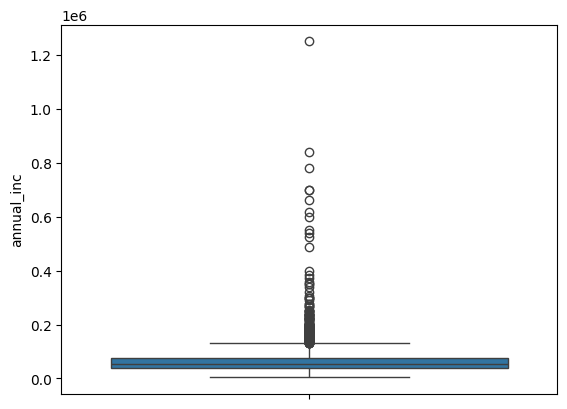

In [32]:
sns.boxplot(df_defaulted['annual_inc'])

In [33]:
df_paid['annual_inc'].describe()

count    3.295000e+04
mean     6.986250e+04
std      6.656225e+04
min      4.000000e+03
25%      4.113275e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:ylabel='annual_inc'>

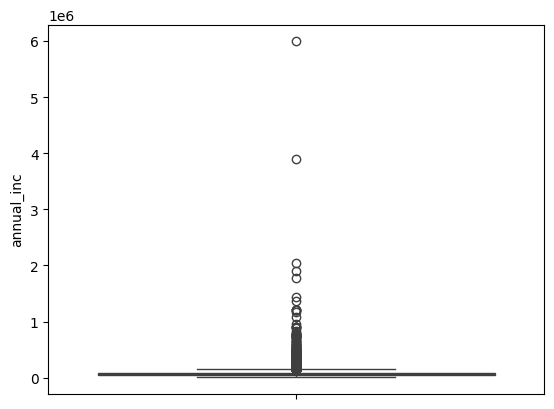

In [34]:
sns.boxplot(df_paid['annual_inc'])

### Lots of outliers, so cleaning outliers

In [35]:
df_clean_defaulted = df_defaulted.loc[df_defaulted['annual_inc'] <= 140000]  

<AxesSubplot:ylabel='annual_inc'>

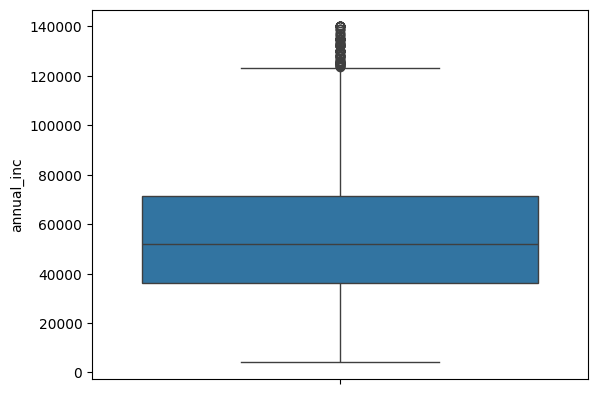

In [36]:
sns.boxplot(df_clean_defaulted['annual_inc'])

In [37]:
df_clean_paid = df_paid.loc[df_paid['annual_inc'] <= 140000]  

<AxesSubplot:ylabel='annual_inc'>

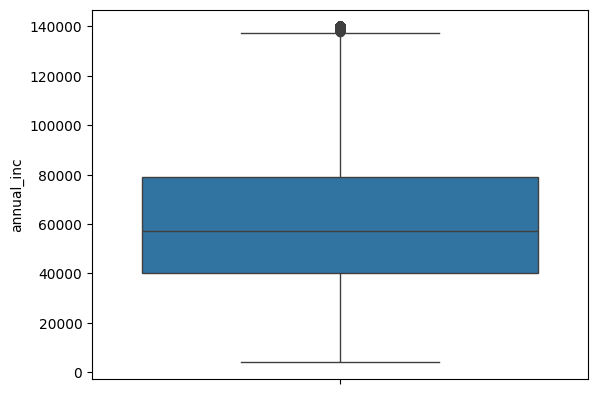

In [38]:
sns.boxplot(df_clean_paid['annual_inc'])

### It can be seen that:

- Median  values of annual income of defaulters and fully paid category are  different and therefore considered as influential variables. 
- Annual income of paid category are found more than that of defaulters. 

### Checking the derived variable perc_installment_income 

In [39]:
# This will tell us how much amount is paid as installment from monthly income. A bit of cleaning the outliers are also done.

df_defaulted['Perc_Installment_Income'].describe()

count    5627.000000
mean        7.373165
std         4.295938
min         0.166378
25%         3.998218
50%         6.631200
75%        10.052049
max        29.755846
Name: Perc_Installment_Income, dtype: float64

<AxesSubplot:ylabel='Perc_Installment_Income'>

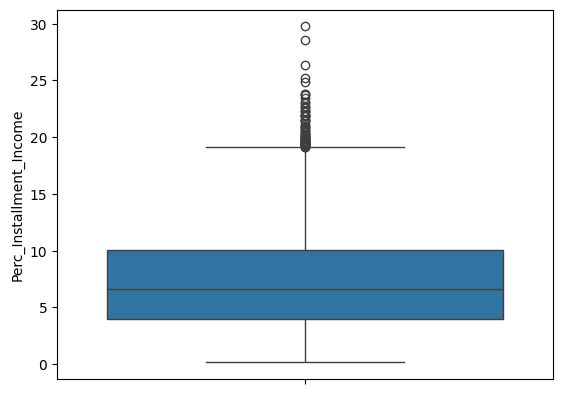

In [40]:
sns.boxplot(df_defaulted['Perc_Installment_Income'])

<AxesSubplot:ylabel='Perc_Installment_Income'>

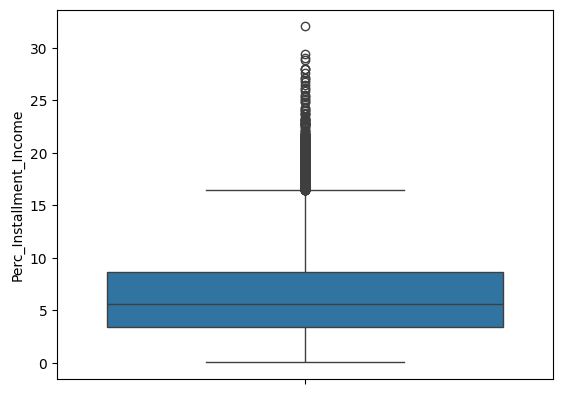

In [41]:
sns.boxplot(df_paid['Perc_Installment_Income'])

In [42]:
df_paid['Perc_Installment_Income'].describe()

count    32950.000000
mean         6.423804
std          3.937103
min          0.028895
25%          3.426421
50%          5.629867
75%          8.617143
max         32.026200
Name: Perc_Installment_Income, dtype: float64

In [43]:
df_clean_inst_paid = df_paid.loc[df_paid['Perc_Installment_Income'] <= 20] 


In [44]:
df_clean_inst_defaulted = df_defaulted.loc[df_defaulted['Perc_Installment_Income'] <= 20] 

<AxesSubplot:ylabel='Perc_Installment_Income'>

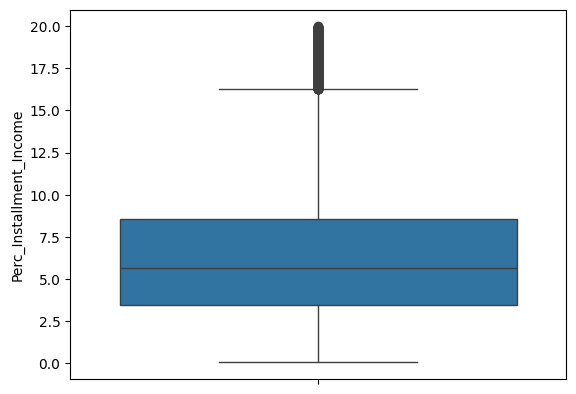

In [45]:
sns.boxplot(df_clean_inst_paid['Perc_Installment_Income'])

<AxesSubplot:ylabel='Perc_Installment_Income'>

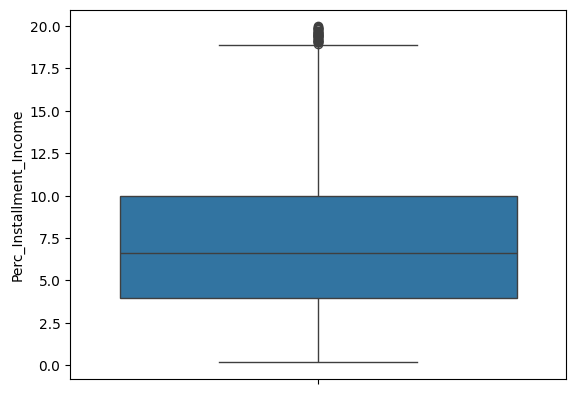

In [46]:
sns.boxplot(df_clean_inst_defaulted['Perc_Installment_Income'])

### It can be seen from above that: 

- perc_installment_income(pecentage of loan installments in monthly income) is higher for defaulters than that for paid category. 
- Therefore can be considered as influencial variable. ie percentage of installment out of monthly income is more for the defaulters

### Now checking whether the derived variable 'debt' has any influence

In [47]:
df_defaulted['Debt'].describe()

count    5.627000e+03
mean     8.457957e+05
std      7.117613e+05
min      0.000000e+00
25%      4.140500e+05
50%      7.315800e+05
75%      1.120772e+06
max      2.726250e+07
Name: Debt, dtype: float64

In [48]:
df_paid['Debt'].describe()

count    3.295000e+04
mean     8.633542e+05
std      6.387686e+05
min      0.000000e+00
25%      4.187500e+05
50%      7.440000e+05
75%      1.158970e+06
max      1.100400e+07
Name: Debt, dtype: float64

### It can be seen that:

- There is not much difference in the percentile and median values of defaulted and paid category in the case of variable 'debt'and therefore influence of this derived variable ruled out.

### Now the derived variable monthly (income-debt) ie difference of monthly income and monthly debt is checked for any patterns in defaulted and paid category

In [49]:
df_defaulted['monthly_income-debt'].describe()

count    5.627000e+03
mean    -6.528070e+04
std      5.679558e+04
min     -2.167708e+06
25%     -8.713900e+04
50%     -5.631000e+04
75%     -3.084550e+04
max      4.745000e+04
Name: monthly_income-debt, dtype: float64

In [50]:
df_paid['monthly_income-debt'].describe()

count     32950.000000
mean     -66124.308820
std       51265.219550
min     -862658.040000
25%      -90145.520833
50%      -56858.950000
75%      -30596.029500
max      495000.000000
Name: monthly_income-debt, dtype: float64

### From the above it can be seen that: 

- There is not much difference in the variable 'monthl_income-debt' in the case of defaulters and paid categories. 
- Surprisingly the values are negative, but no specific influence in the purpose of the case study. 
- But 'perc_installment_income' is an indicator which is already considered as influential variable.

### Checking if loan amount has any influence

In [51]:
df_paid['loan_amnt'].describe()

count    32950.000000
mean     10866.455994
std       7199.629493
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [52]:
df_defaulted['loan_amnt'].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### From the above it can be seen that:

- Loan amount is almost the same for the defaulted and paid category and therefore ruled out

<AxesSubplot:xlabel='annual_inc', ylabel='dti'>

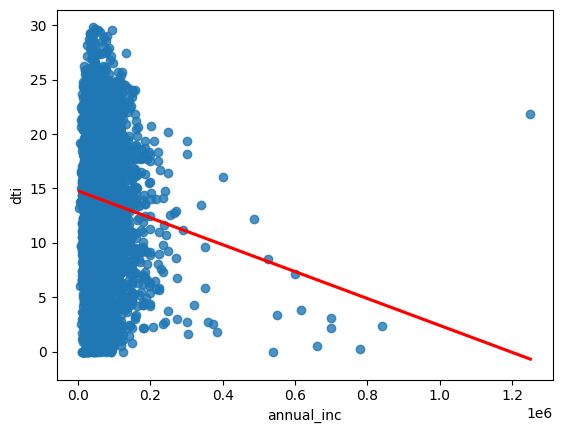

In [53]:
# Plotting a Regression Plot to check the impact of annual income over DTI

sns.regplot(x=df_defaulted['annual_inc'], y=df_defaulted['dti'], ci=False, line_kws={'color':'red'})

### From the above it can be seen that:

- DTI value decreases with increase in income, but found not relevant to the purpose of the casestudy

### Checking correlation matrices with 4 variables, but no specific patterns could be observed

In [54]:
df_corr = df[['installment', 'annual_inc', 'dti', 'loan_amnt']]

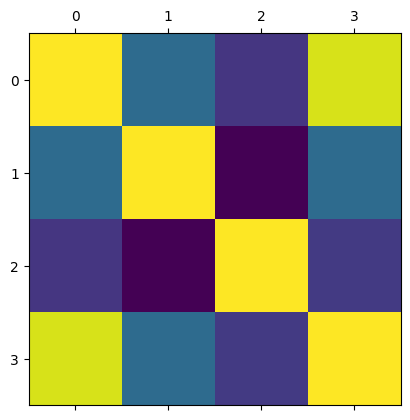

In [55]:
plt.matshow(df_corr.corr())
plt.show()

<AxesSubplot:>

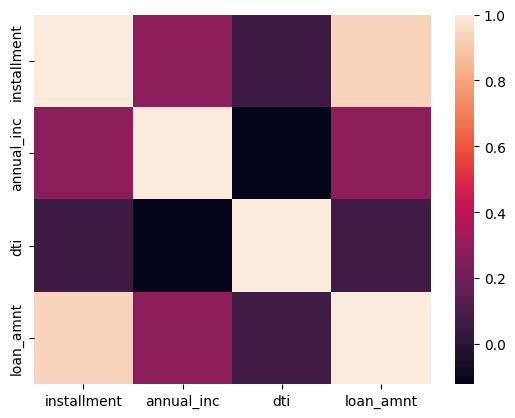

In [56]:
corr = df_corr.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [57]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Making a pivot table with the categories as given beow, with agg function as median

In [58]:
df_pivot=df_useful[['annual_inc', 'dti', 'loan_amnt', 'installment', 'loan_status', 'Debt', 'monthly_income-debt', 'revol_bal', 'revol_util', 'Perc_Installment_Income']]

In [59]:
pd.pivot_table(df_pivot, index='loan_status', aggfunc=np.median)

Debt  Perc_Installment_Income  annual_inc    dti  \
loan_status                                                         
Charged Off  731580.0                 6.631200     53000.0  14.29   
Current      957810.0                 6.702557     65000.0  15.05   
Fully Paid   744000.0                 5.629867     60000.0  13.20   

             installment  loan_amnt  monthly_income-debt  revol_bal  \
loan_status                                                           
Charged Off       293.87      10000            -56310.00     9211.0   
Current           368.19      15825            -73925.00    12627.5   
Fully Paid        275.65       9600            -56858.95     8682.5   

             revol_util  
loan_status              
Charged Off       58.40  
Current           54.95  
Fully Paid        47.60

### From the above it can be seen that:

- 'revol_util' varies significantly between defaulted and paid categories and therefore taken for further analysis. 
- Among the other variables, we have already seen that 'annual_inc', 'Perc_Installment_Income' are influential varaibles. 
- The other variables don't differ significantly in values between defaulted and paid category. 
- So picks from the above are (1) 'revol_util', (2) 'Perc_installment_income', (3) 'annual_inc'

### Box plots made for the above mentioned case

(-4.995000000000001, 104.89500000000001)

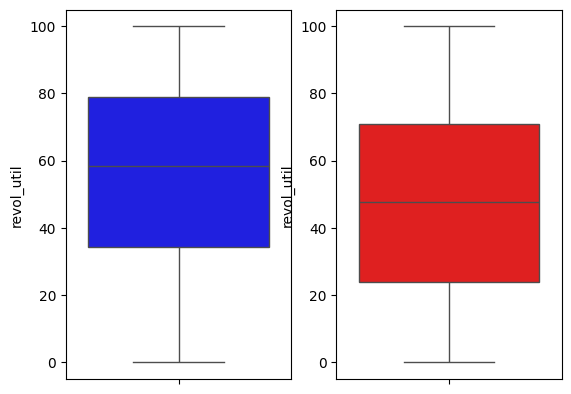

In [60]:
fig, axis = plt.subplots(1,2)

sns.boxplot(y=df_defaulted['revol_util'], color='blue', ax=axis[0])
sns.boxplot(y=df_paid['revol_util'], color='red', ax=axis[1])
ylim0 = axis[0].get_ylim()
ylim1 = axis[1].get_ylim()
ylim = (min(ylim0[0], ylim1[0]), max(ylim0[1], ylim1[1]))
axis[0].set_ylim(ylim)
axis[1].set_ylim(ylim)

### From the above, it can be seen that:

- The revol_util is higher for defaulted category, which means the percentage of credit utilization is higher for defaulted

In [61]:
df_defaulted['revol_util'].describe()

count    5611.000000
mean       55.572110
std        27.905282
min         0.000000
25%        34.400000
50%        58.400000
75%        79.000000
max        99.900000
Name: revol_util, dtype: float64

In [62]:
df_paid['revol_util'].describe()

count    32916.000000
mean        47.531801
std         28.276743
min          0.000000
25%         23.900000
50%         47.600000
75%         70.800000
max         99.900000
Name: revol_util, dtype: float64

### From the above, it can be seen that:

- The revol_util is higher for defaulted category, which means the percentage of credit utilization is higher for defaulted

### Now analyzing 'dti'

In [63]:
df_paid['dti'].describe()

count    32950.000000
mean        13.148421
std          6.680041
min          0.000000
25%          7.980000
50%         13.200000
75%         18.390000
max         29.990000
Name: dti, dtype: float64

In [64]:
df_defaulted['dti'].describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

### From the above it can be seen that that:

- The median and the percentile values are significantly higher for defaulted category when compared with paid category. 'dti' has an influence in the purpose of the case study

### To summarise from the above analysis it can be seen that:
- The variables 'dti', 'annual_inc', 'perc_installment_income' and 'revol_util'  have significant influence in deriving the pattern of defaulters. 
- It can be found that the 'dti', 'perc_installment_income' and 'revol_util' are much more for the defaulters compared to the  paid category.
- 'annual_inc' is much more for the paid category when compared to the defaulters.

### It can be clearly seen in the plots below

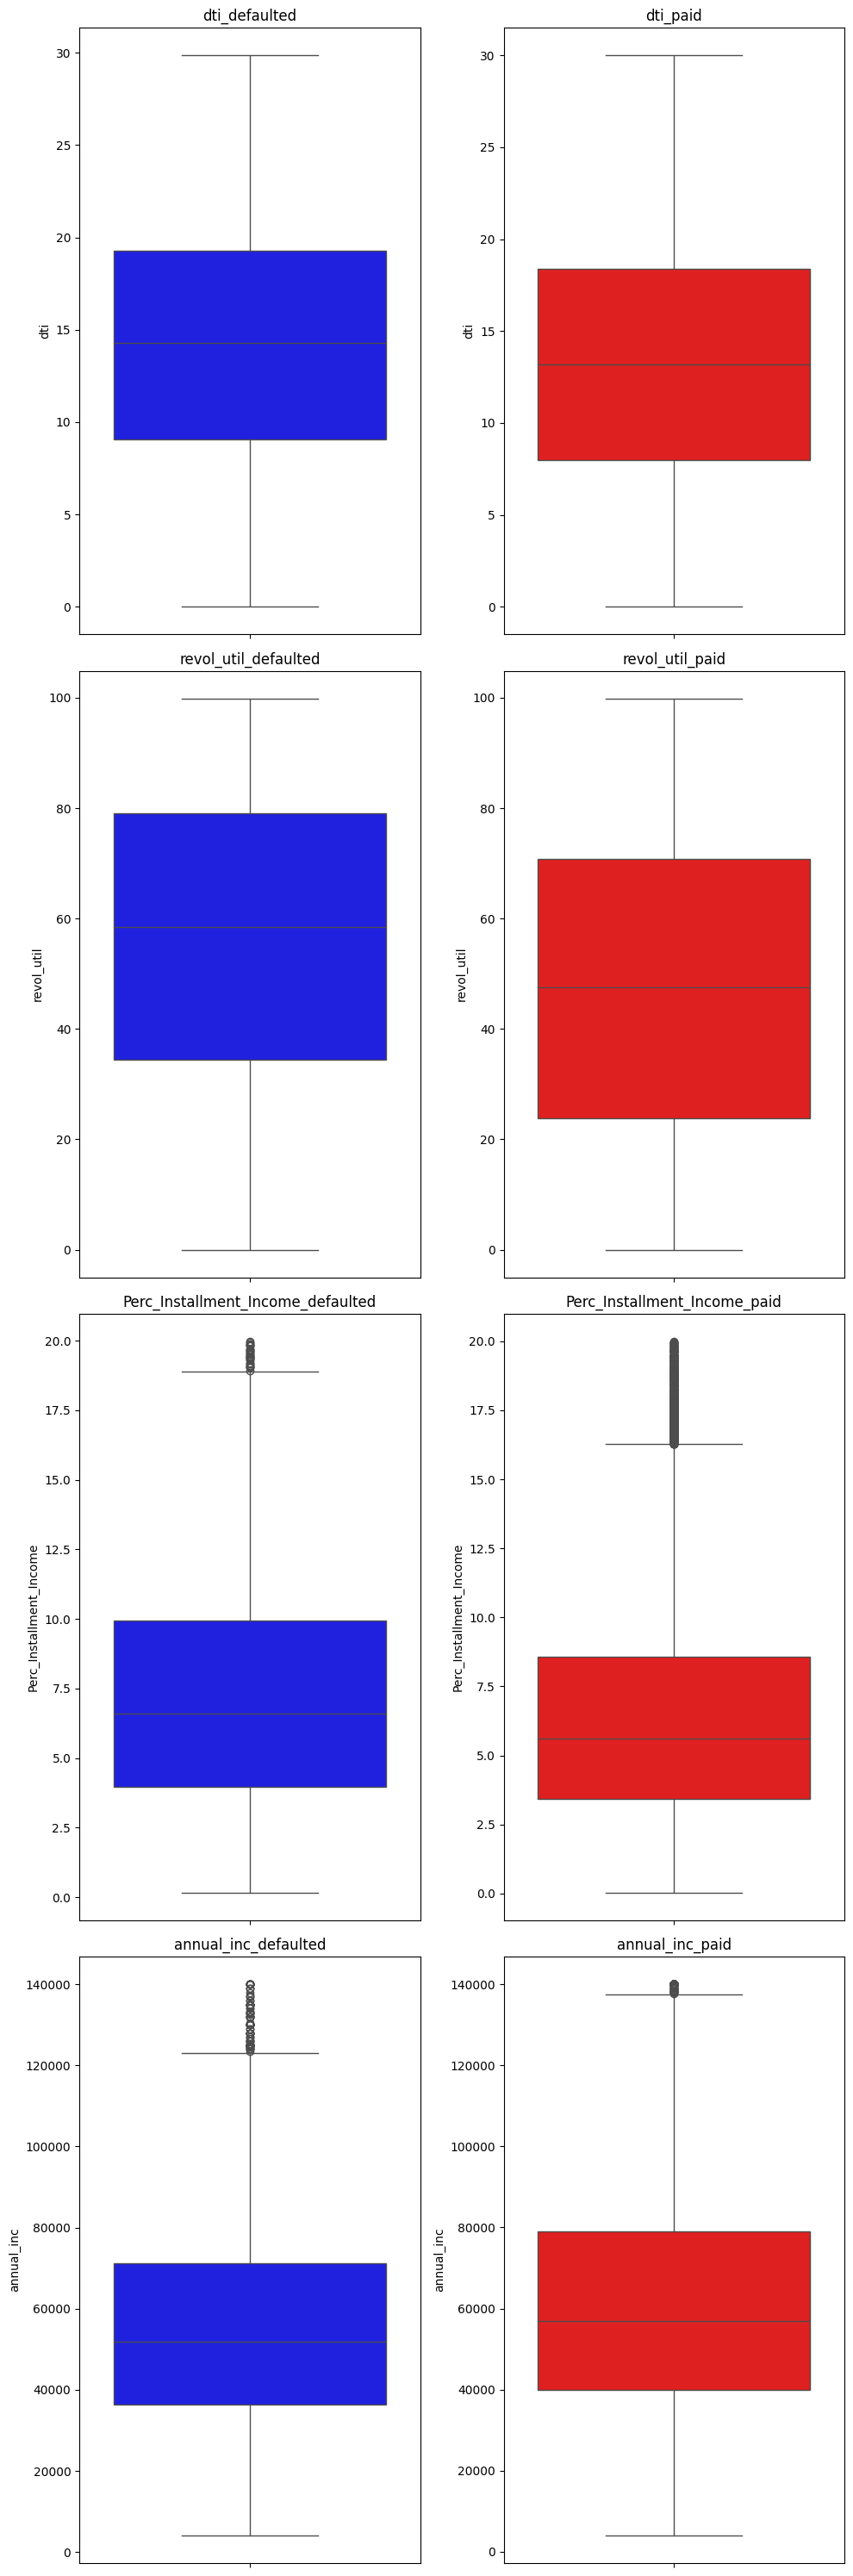

In [65]:
fig, axis = plt.subplots(4,2, figsize=(10,30))

sns.boxplot(y=df_defaulted['dti'], color='blue', ax=axis[0][0])
axis[0,0].set_title('dti_defaulted')

# Plotting a boxplot for dti_paid

sns.boxplot(y=df_paid['dti'], color='red', ax=axis[0][1])
axis[0,1].set_title('dti_paid')

# Plotting a boxplot for revol_util for people who were defaulted

sns.boxplot(y=df_defaulted['revol_util'], color='blue', ax=axis[1][0])
axis[1,0].set_title('revol_util_defaulted')

# Plotting a boxplot for revol_util for people who paid their dues on time

sns.boxplot(y=df_paid['revol_util'], color='red', ax=axis[1][1])
axis[1,1].set_title('revol_util_paid')

# Plotting a boxplot for percentage of installment income they pay for defaulted people.

sns.boxplot(y=df_clean_inst_defaulted['Perc_Installment_Income'], color='blue', ax=axis[2][0])
axis[2,0].set_title('Perc_Installment_Income_defaulted')

# Plotting a boxplot for percentage of installment income they pay for people who paid their dues on time.

sns.boxplot(y=df_clean_inst_paid['Perc_Installment_Income'], color='red', ax=axis[2][1])
axis[2,1].set_title('Perc_Installment_Income_paid')

# Plotting a boxplot to check the annaul income of people who got defaulted.

sns.boxplot(y=df_clean_defaulted['annual_inc'], color='blue', ax=axis[3][0])
axis[3,0].set_title('annual_inc_defaulted')

# Plotting a boxplot to check the annual income of people who paid their dues on time.

sns.boxplot(y=df_clean_paid['annual_inc'], color='red', ax=axis[3][1])
axis[3,1].set_title('annual_inc_paid')

plt.tight_layout()
plt.show()

### Scatter plot to understand the disperity between annual income and loan status

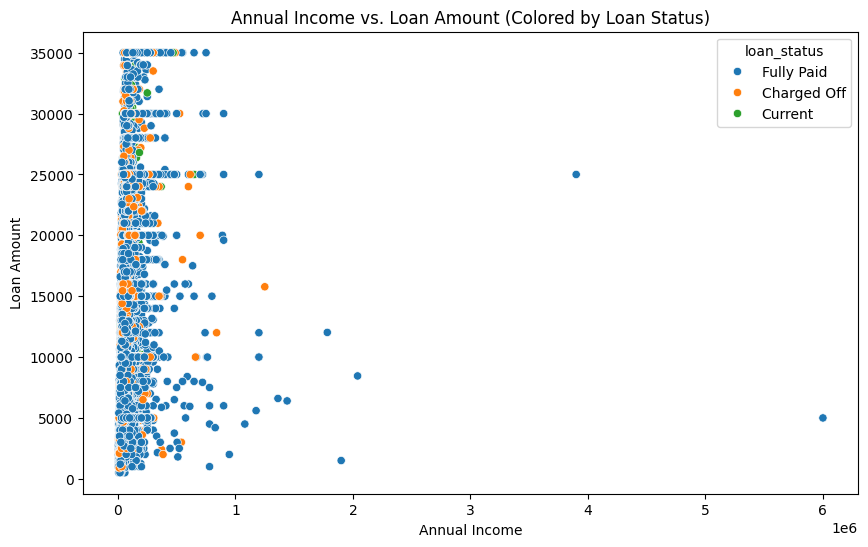

In [66]:
# Scatter plot below allow us to understand the spread of loan status across different levels of income.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_useful, x='annual_inc', y='loan_amnt', hue='loan_status')
plt.title('Annual Income vs. Loan Amount (Colored by Loan Status)')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()


#### From the above chart we can conclude that:
- The annual income has no significant impact on the loan status. 
- People who were charged off for not paying the due amount on time falls under all income levels. 

### Box plot for Purpose Vs DTI 

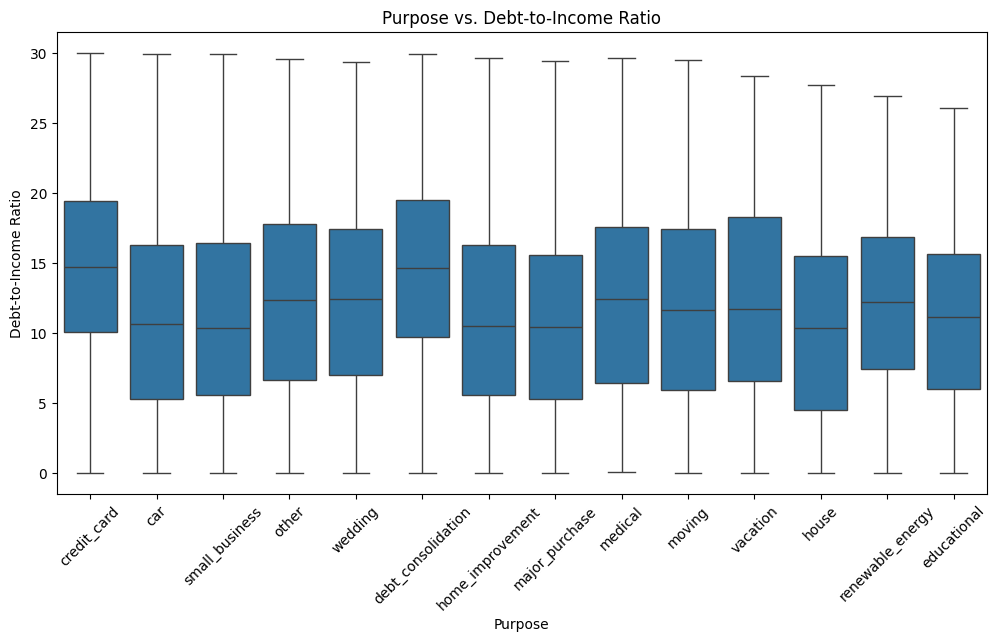

In [67]:
# Boxplot below shows us how the DTI differs for different purposes of a loan

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_useful, x='purpose', y='dti')
plt.title('Purpose vs. Debt-to-Income Ratio')
plt.xlabel('Purpose')
plt.ylabel('Debt-to-Income Ratio')
plt.xticks(rotation=45)
plt.show()

### From the above figure we understand that:

- DTI is comparatively higher for people who takes loan for credit card or debt consolidation. 
- People who fall under these two categories i.e., credit card and debt consolidation most likely manage their finance poorly. 
- Due to this reason, they are the potential applicants who might not be able to repay their dues on time.

### Distribution of annual income for each loan category 



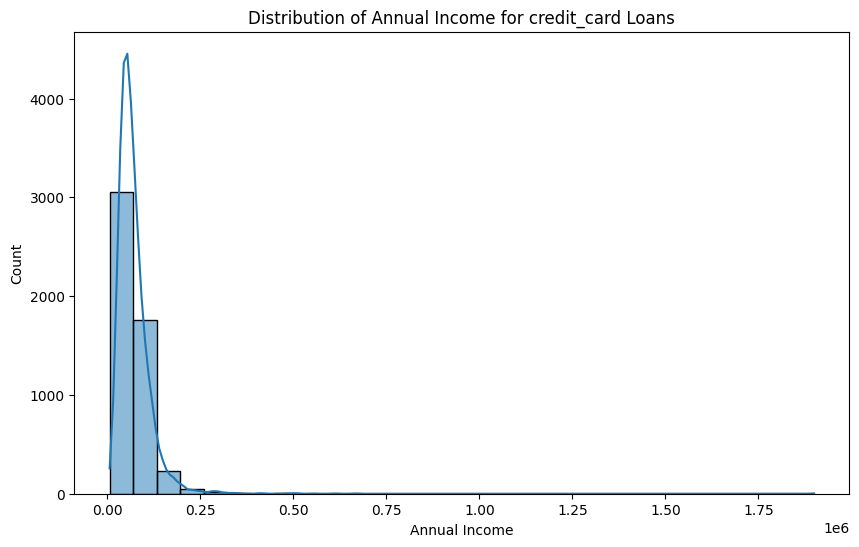

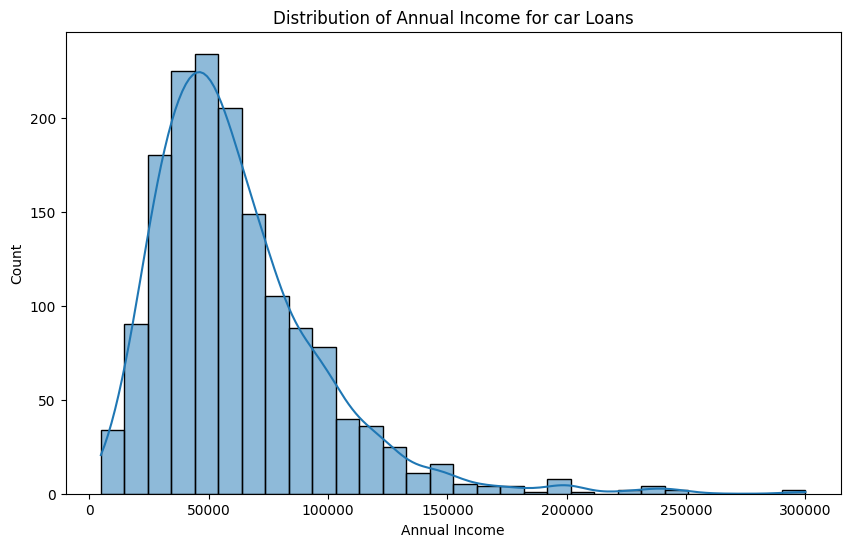

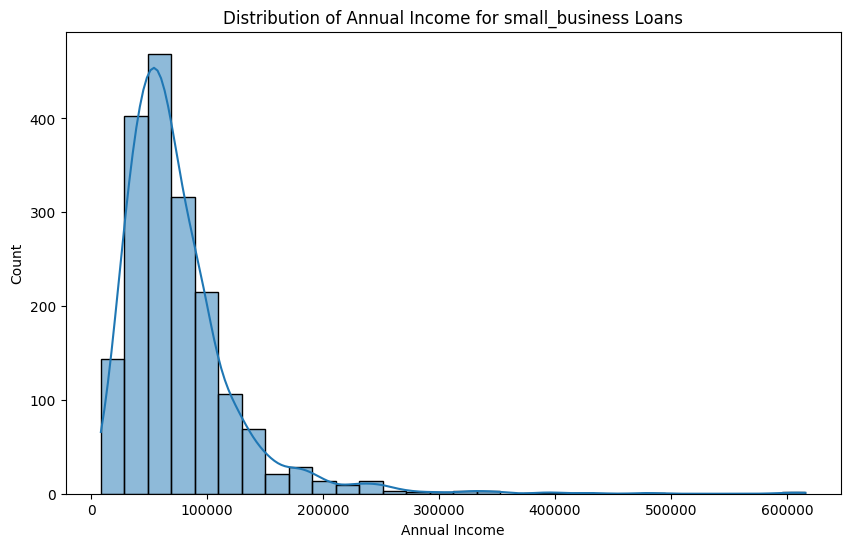

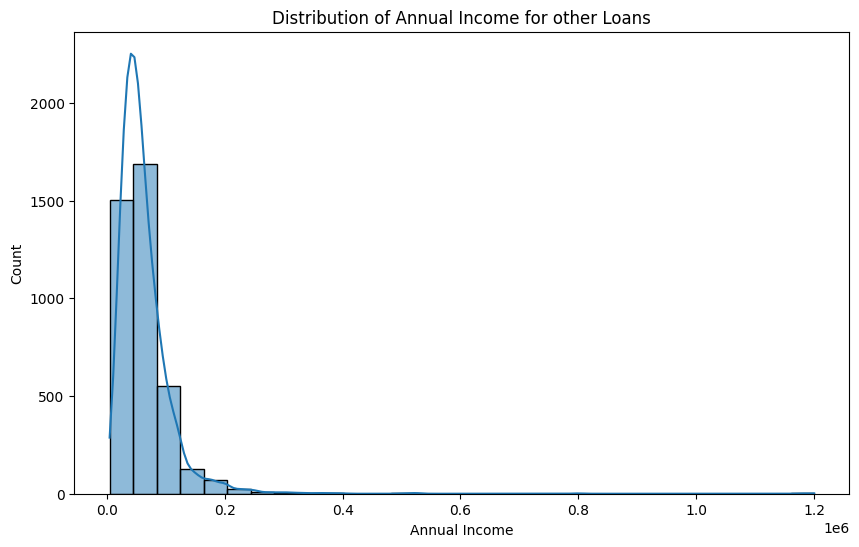

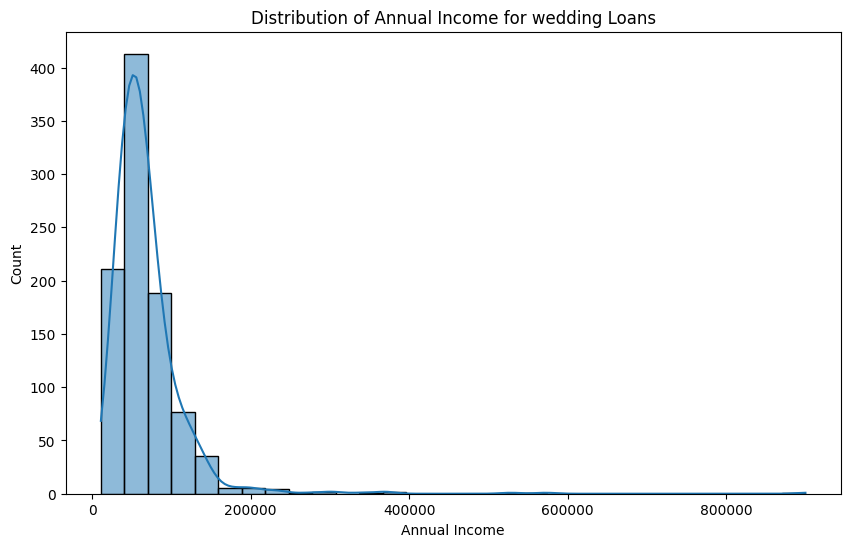

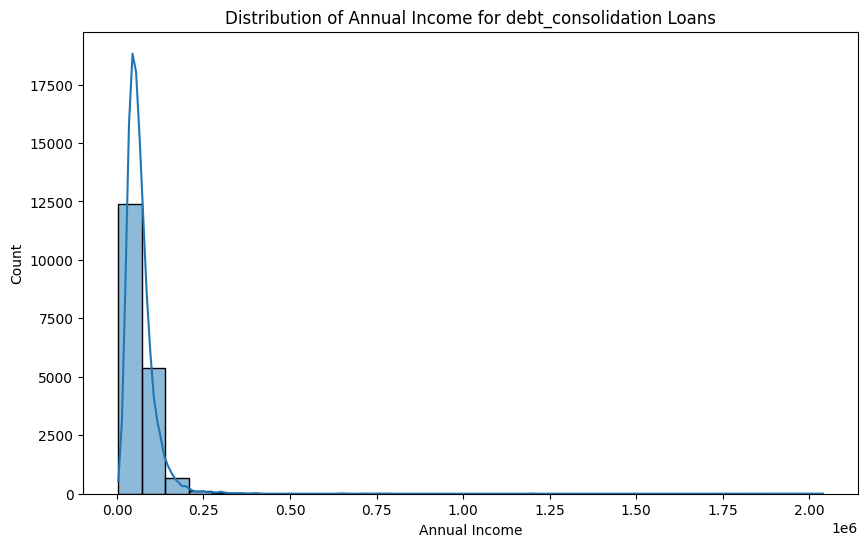

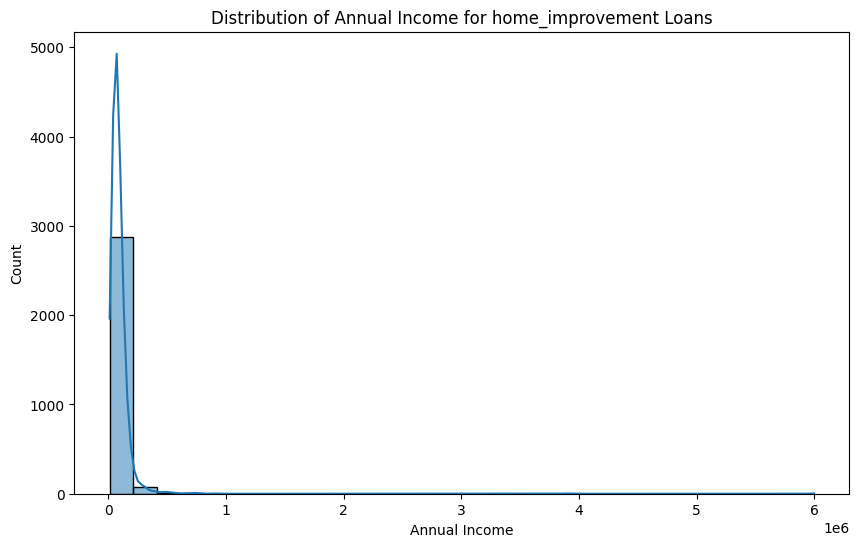

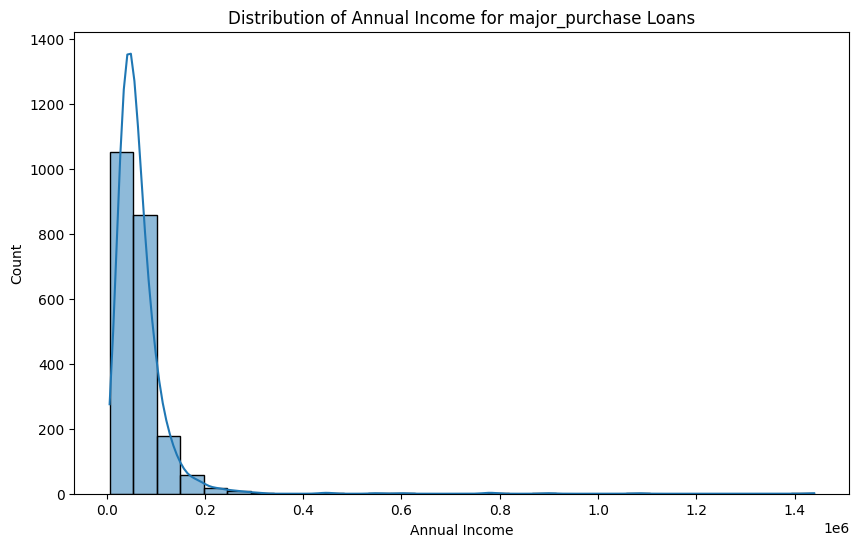

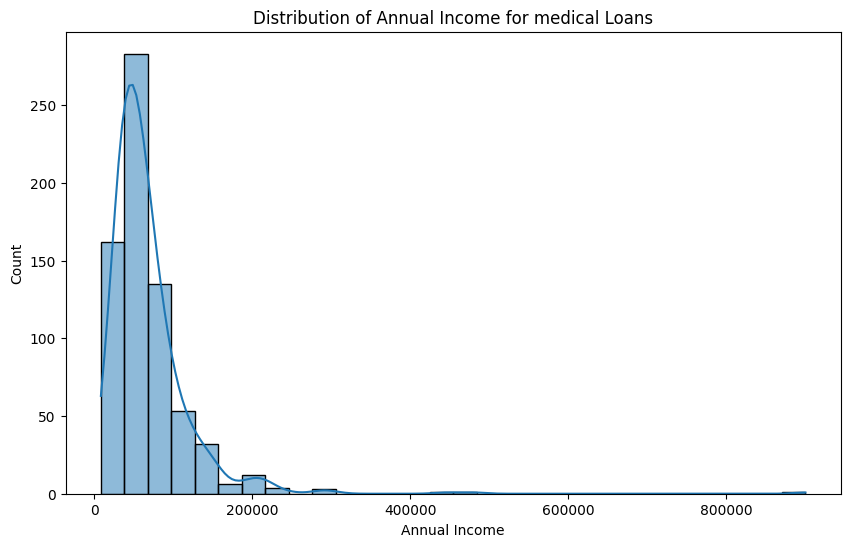

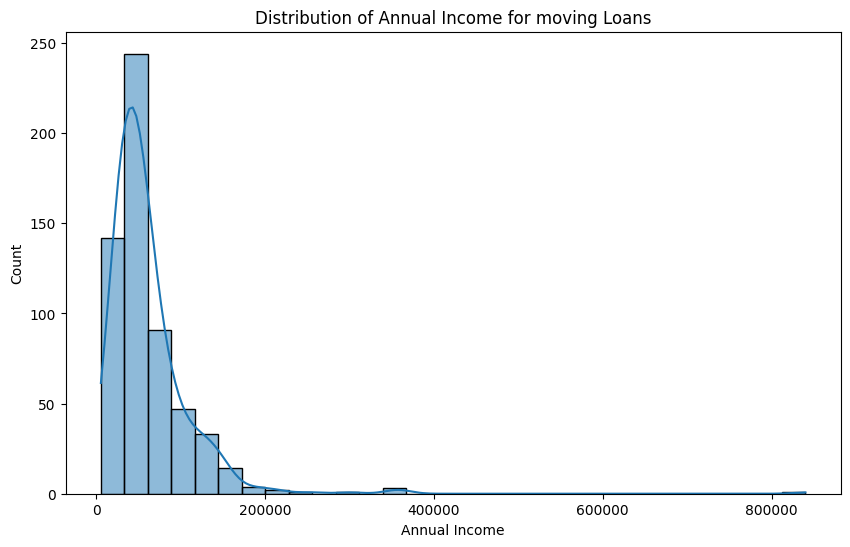

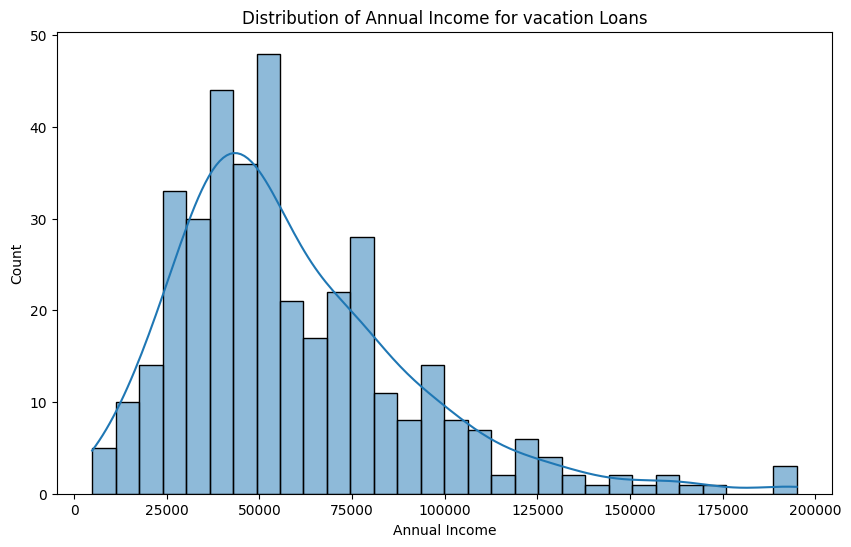

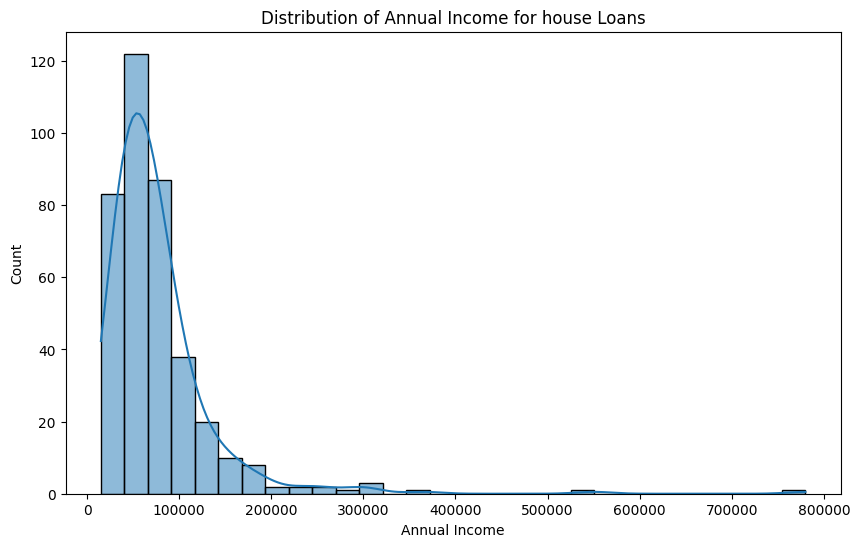

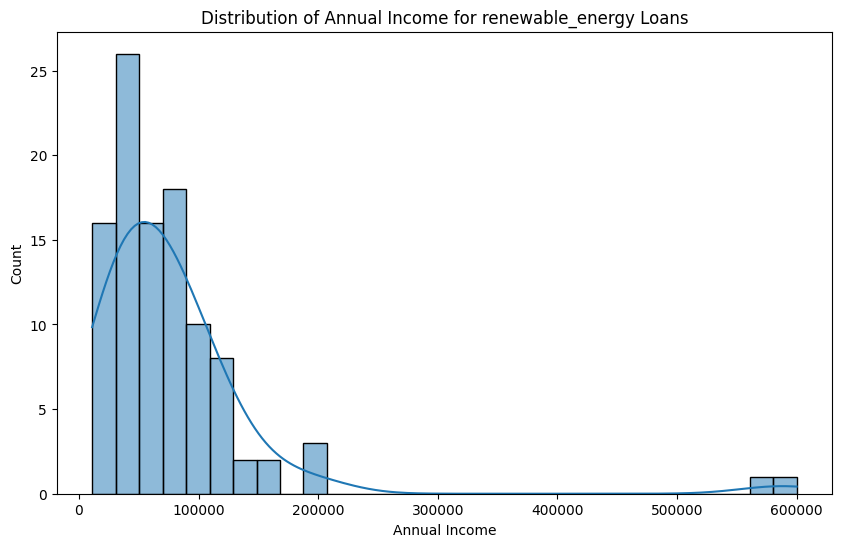

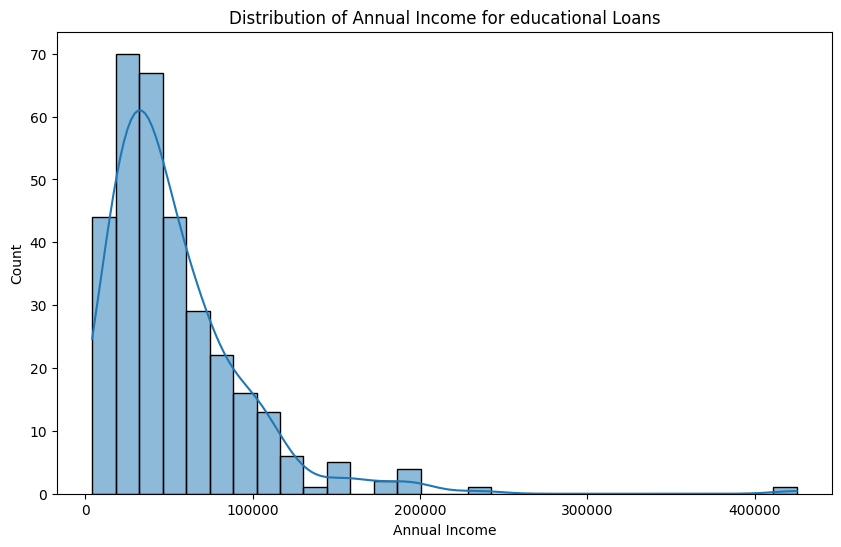

In [68]:
# The below histogram will tell us that based on income level of an individual which loan category they would likely fall under.

segment_categories = df_useful['purpose'].unique()

# Perform univariate analysis for each category

for category in segment_categories:
    category_data = df_useful[df_useful['purpose'] == category]

    # Plot the distribution of 'annual_inc' for each category
    
    plt.figure(figsize=(10, 6))
    sns.histplot(category_data['annual_inc'], bins=30, kde=True)
    plt.title(f'Distribution of Annual Income for {category} Loans')
    plt.xlabel('Annual Income')
    plt.ylabel('Count')
    plt.show()

### From the above figures, we understand that:

- People who earn less would most likely take loan for credit card, dept consolidation, home imporovement loans or major purchases. 
- People who earn slighly more than the lower income band would likely apply for weeding loans, small business loans, car loan, vacation, medical loan and house loan and education loan.
- People who earn more would likely apply for vacation loans or car loans to some extent. 

### Revolving balance for credit card loans, dept consolidation and vacation 

In [69]:
# Extacting the data only for the credit card, dept consolidation and vacation purpose

credit_card_loans = df_useful[df_useful['purpose'] == 'credit_card']
debt_consolidation_loans = df_useful[df_useful['purpose'] == 'debt_consolidation']
vacation_loans = df_useful[df_useful['purpose'] == 'vacation']

# Extracting the Revolving balance for each category

credit_card_revol_bal = credit_card_loans['revol_bal']
debt_consolidation_revol_bal = debt_consolidation_loans['revol_bal']
vacation_revol_bal = vacation_loans["revol_bal"]

credit_card_revol_bal.head()

0     13648
13     7323
22    10056
25    13707
29     6441
Name: revol_bal, dtype: int64

([<matplotlib.axis.XTick at 0x253178e8c70>,
 [Text(0, 0, '_'),
  Text(1, 0, 'Credit Card'),
  Text(2, 0, 'Debt Consolidation')])

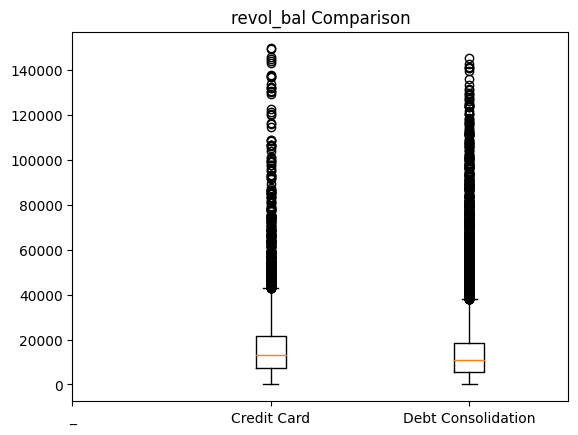

In [70]:
# Plotting a boxplot for Revolving balance for Credit card and Dept consolidation

plt.boxplot([credit_card_revol_bal, debt_consolidation_revol_bal])
plt.title('revol_bal Comparison')
ticks=['_', 'Credit Card', 'Debt Consolidation']
plt.xticks(ticks=range(len(ticks)), labels=ticks)


### From the above figure we can see that:

- Revolving balance is similar for Credit card and Debt consolidation 

([<matplotlib.axis.XTick at 0x253181b34f0>,
 [Text(0, 0, '_'), Text(1, 0, 'Credit Card'), Text(2, 0, 'Vacation')])

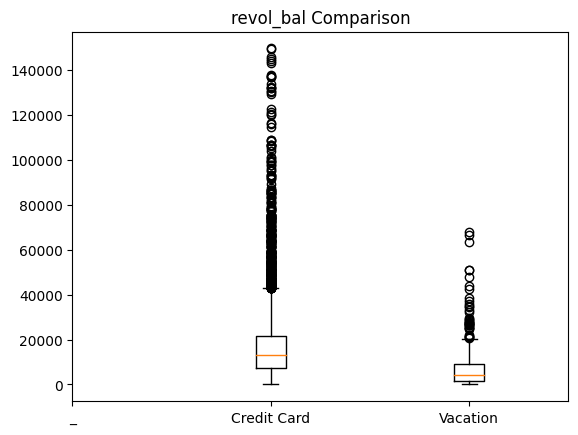

In [71]:
# # Plotting a boxplot for Revolving balance for Credit card and Vacation

plt.boxplot([credit_card_revol_bal, vacation_revol_bal])
plt.title('revol_bal Comparison')
ticks=['_', 'Credit Card', 'Vacation']
plt.xticks(ticks=range(len(ticks)), labels=ticks)

([<matplotlib.axis.XTick at 0x2531fdaddf0>,
 [Text(0, 0, '_'), Text(1, 0, 'Credit Card'), Text(2, 0, 'Vacation')])

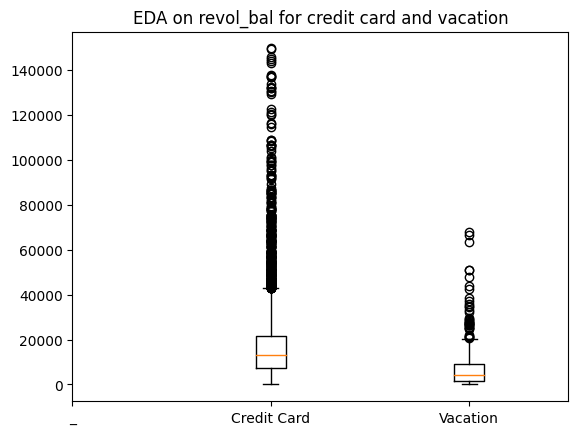

In [72]:
# Plotting a boxplot for Revolving balance for Credit card and Vacation


plt.boxplot([credit_card_revol_bal, vacation_revol_bal])
plt.title('EDA on revol_bal for credit card and vacation')
ticks=['_', 'Credit Card', 'Vacation']
plt.xticks(ticks=range(len(ticks)), labels=ticks)

### From the above figure we can see that:

- Revolving balance is very less for Vacation as compared to Credit Card. 
- This tell us that people who takes loan for vacation would likely pay their dues on time and won't rovolve their balance.

### SUMMARY OF THE ABOVE ANALYSIS FROM THE POINT OF VIEW OF IDENTIFYING POSSIBLE DEFAULTERS
####  The following variables are influential:
- <u>dti</u>:        dti(debt to income ratio) of defaulters are found to be higher than that of fully paid category. dti value of above 15 is having possibility of default risk.
- <u>annual_inc</u>: annual income of defaulters is found to be lower than that of the fully paid category. Annual income of less than 40000 per annum is coming under possibility of default risk category.
- <u>revol_util</u>: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit - is higher for defaulters when compared to fully paid category. Applicants with revol_utils greater than 58% come under possibility of default  risk category.
- <u>Perc_Installment_Income</u>: Percentage of loan installments in monthly income(derived variable) is found to be more for defaulters when - compared with the fully paid category. If the percentage of amount the applicant pays for loan installments is higher than 10% of his montly income, the applicant comes under possibility of default risk category.
- <u>Purpose</u>:    If the loans are taken for credit card or debt consolidation, those applicants are possibly risky especially if dti is more than 15.